# **Colors**

Colors are often represented in computers as vectors with three dimensions:  *Red*, *Green*, and *Blue* (RGB). In other words, a color is expressed as an RGB triplet $(r,g,b)$, each component of which can vary from zero to a defined maximum value:

![rgb slider](https://upload.wikimedia.org/wikipedia/commons/1/12/RGB_sliders.svg)

If all the components are at zero the result is black. If, by contrast, all are at maximum, the result is the brightest representable white.


In this notebook, you will practice basic vector operations with color vectors from an [xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/).

## **Loading the data**

First, we'll load the original JSON-file into a Python dictionary.

In [ ]:
import requests, json

url = 'https://raw.githubusercontent.com/evgeniyako-edu/corpora/master/data/colors/xkcd.json'
response = requests.get(url)

raw_data = json.loads(response.text)

Take a look at the content of $\texttt{raw_data}$. 

In [ ]:
raw_data['colors'][20]

{'color': 'windows blue', 'hex': '#3778bf'}

You can notice that the original format is not very convenient to use. Let's convert hex color values into RGB-triplets and create a new dictionary {$\texttt{"color_name": [r, g, b]}$}.

Run the cells below to do so.

In [ ]:
def hex_to_rgb(color_hex):
    color_hex = color_hex.lstrip("#")
    return [int(color_hex[:2], 16), int(color_hex[2:4], 16), int(color_hex[4:6], 16)]

In [ ]:
colors = dict()

for item in raw_data['colors']:
    colors[item['color']] = hex_to_rgb(item['hex'])

Take a look at the content of the $\texttt{colors}$ dictionary now.

In [ ]:
colors['windows blue']

[55, 120, 191]

In [ ]:
color_list = list(colors.keys())

## **Plotting the data**

To have a better idea of which colors are present in our dataset, let's plot them as points in a 3D space (with Red, Green and Blue as axes).

Assign each point a color that it represents.

Hint 1: [$\texttt{scatter3D}$](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html) function from the $\texttt{matplotlib}$ library might be useful for plotting points in 3D.

Hint 2: In $\texttt{matplotlib}$, you can specify color by giving it's name from the xkcd survey with an $\texttt{'xkcd:'}$ prefix. See [documentation](https://matplotlib.org/3.1.0/tutorials/colors/colors.html) for more info.

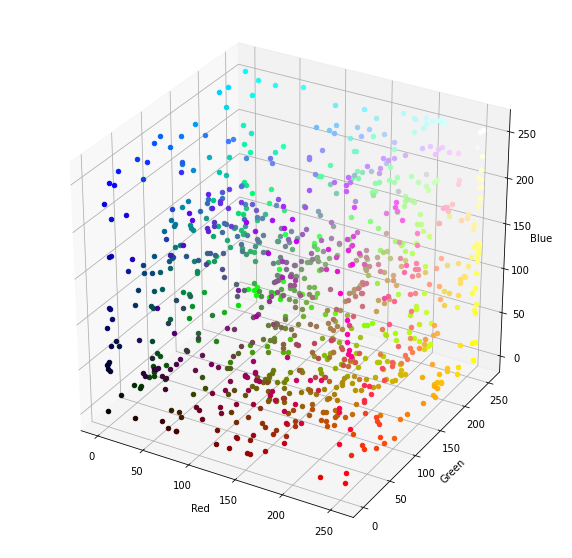

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

for color in color_list:
  red_value = colors[color][0]
  green_value = colors[color][1]
  blue_value = colors[color][2]
  ax.scatter(red_value, green_value, blue_value, c='xkcd:'+color)

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()

Take a look at the plot you've obtained. Where are 'redish', 'greenish' and 'blueish' colors located? What can you say about the location of similar colors?

## **Distances between colors**

Recall that Euclidian distance between two points $x=(x_1, ..., x_n)$ and $y = (y_1, ..., y_n)$ in an $n$-dimensional space is defined as follows:

$dist(x, y) = ||x-y||_2 = \sqrt{(x_1-y_1)^2 + ... + (x_n-y_n)^2}$.

Implement a function that computed Euclidian distance between two colors in the RGB-space.

In [ ]:
import numpy as np

def distance(color1, color2):
  dist_red = (color1[0] - color2[0])**2
  dist_blue = (color1[1] - color2[1])**2
  dist_green = (color1[2] - color2[2])**2
  return np.sqrt(dist_red + dist_blue + dist_green)

Try to use your function for computing distances between different colors in the data. What do you observe?

In [ ]:
distance(colors['red'], colors['dark red'])

97.0

In [ ]:
distance(colors['red'], colors['blue'])

324.49036965678965

Now, implement a function that, given some RGB-vector, returns $n$ closest colors from our $\texttt{colors}$ dictionary.

In [ ]:
def find_n_closest(colors, new_color, n=5):
  closest_colors = {}
  for color in colors.keys():
    closest_colors[color] = distance(new_color, colors[color])
  sorted_closest_colors = dict(sorted(closest_colors.items(), key=lambda item: item[1]))
  for color, dist in list(sorted_closest_colors.items())[:n]:
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.set_facecolor('xkcd:'+color) 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(color)

Now, let's take some random new color and find $n=10$ closest colors to it in our dictionary. 

Experiment with different colors! 

10 closest colors



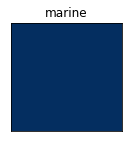

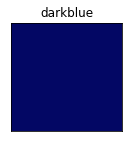

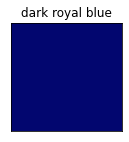

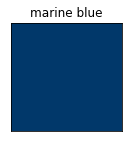

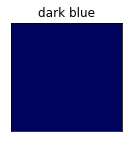

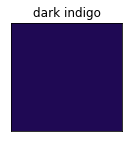

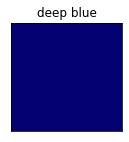

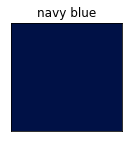

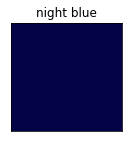

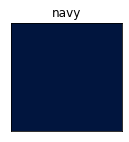

In [ ]:
n = 10
new_color = [12, 30, 100]

print(n, 'closest colors\n')

find_n_closest(colors, new_color, n)

## **Operations with color vectors**

Let's now try to perform some vector operations on the RGB-vectors.

### Vector addition

Define a function that sums up to vectors.

In [ ]:
def add_colors(colors, color1, color2):
  gamma = 0.7
  c1 = (np.array(colors[color1])/255)**gamma
  c2 = (np.array(colors[color2])/255)**gamma
  summa = (c1+c2)/2
  new_col = 255*summa**(1/gamma)
  
  return new_col

Let's consider two colors, for example $\texttt{red}$ and $\texttt{blue}$:

Text(0.5, 1.0, 'red')

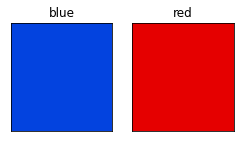

In [ ]:
color1 = 'blue'
color2 = 'red'

# Plotting the colors 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

Which colors in our dictionary are the closest to the sum of those two colors?

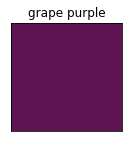

In [ ]:
new_color = add_colors(colors, color1, color2)
find_n_closest(colors, new_color, n=1)

Experiment with more colors!

Text(0.5, 1.0, 'white')

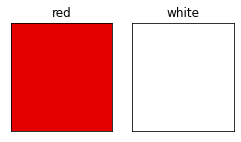

In [ ]:
color1 = 'red'
color2 = 'white'

# Plotting the colors 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

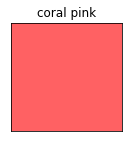

In [ ]:
new_color = add_colors(colors, color1, color2)
find_n_closest(colors, new_color, n=1)

### Vector subtraction

Define a function that subtracts one vector from the other.

In [ ]:
def subtract_colors(colors, color1, color2):
  gamma = 0.7
  c_sum = (np.array(colors[color1])/255)**gamma
  c = (np.array(colors[color2])/255)**gamma
  diff = 2*c_sum-c
  new_col = 255*diff**(1/gamma)

  return new_col

Now, let's consider $\texttt{purple}$ and $\texttt{red}$:

Text(0.5, 1.0, 'red')

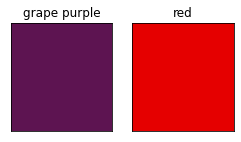

In [ ]:
color1 = 'grape purple'
color2 = 'red'

# Plotting the colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

What does the difference between them looks like? Find the closest colors n our dictionary.

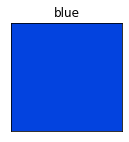

In [ ]:
new_color = subtract_colors(colors, color1, color2)
find_n_closest(colors, new_color, n=1)

Text(0.5, 1.0, 'white')

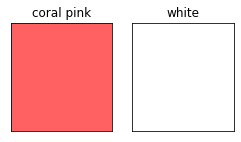

In [ ]:
color1 = 'coral pink'
color2 = 'white'

# Plotting the colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.set_facecolor('xkcd:'+color1) 
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title(color1)

ax2.set_facecolor('xkcd:'+color2) 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(color2)

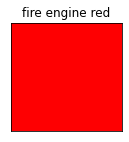

In [ ]:
new_color = subtract_colors(colors, color1, color2)
find_n_closest(colors, new_color, n=1)